In [2]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, SGDClassifier, SGDRegressor, ElasticNet
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

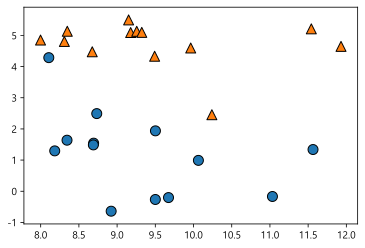

In [9]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

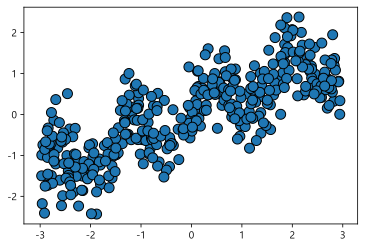

In [13]:
X, y = mglearn.datasets.make_wave(n_samples=400)
mglearn.discrete_scatter(X, y)

In [14]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
cancer['data'].shape, cancer['target'].shape

((569, 30), (569,))

In [17]:
{n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}

{'malignant': 212, 'benign': 357}

In [20]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

In [24]:
boston = mglearn.datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

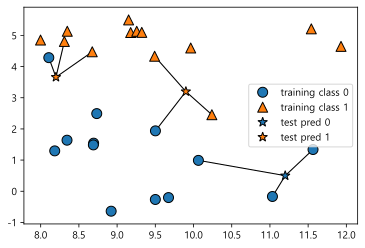

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [26]:
X, y = mglearn.datasets.make_forge()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
knn = KNeighborsClassifier(n_neighbors=3, metric='cityblock').fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9473684210526315, 0.8571428571428571)

In [30]:
knn.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

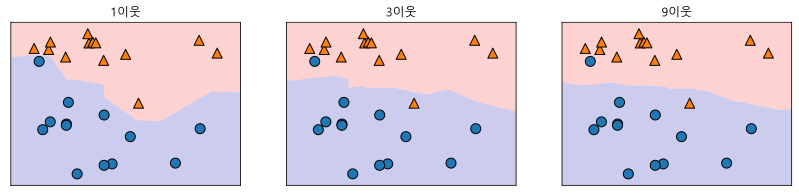

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(14, 3))
for n_nei, ax in zip([1, 3, 9], axs.ravel()):
    knn = KNeighborsClassifier(n_neighbors=n_nei).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, alpha=0.2, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_nei}이웃')

In [35]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=66)

In [38]:
train_acc = []
test_acc = []
nei_settings = range(1, 31, 2)
for n_nei in nei_settings:
    knn = KNeighborsClassifier(n_neighbors=n_nei).fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

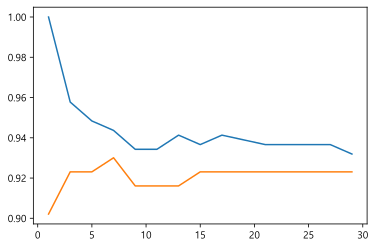

In [39]:
plt.plot(nei_settings, train_acc, label='train')
plt.plot(nei_settings, test_acc, label='test')

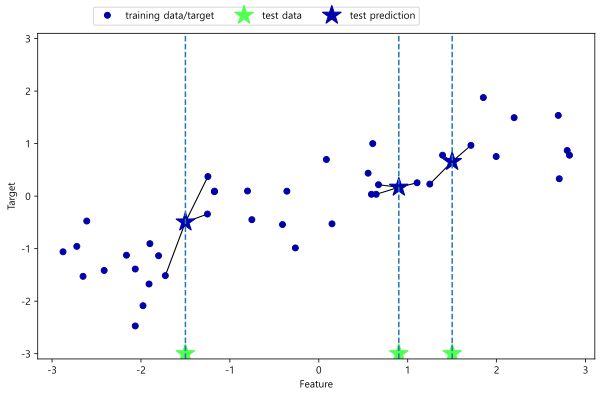

In [40]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [41]:
X, y = mglearn.datasets.make_wave(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.7907506103901912, 0.7611479090955788)

In [44]:
X, y = mglearn.datasets.make_wave(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6335981977103506, 0.7467727639987141)

In [46]:
lr.coef_, lr.intercept_

(array([0.42628067]), 0.08052836281927592)

In [47]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [48]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test), lr.coef_, lr.intercept_

(0.9520519609032728,
 0.6074721959665788,
 array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
        -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
         2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
        -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
         1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
         5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
        -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
        -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
        -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
         6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
        -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
        -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
        -1.23153942e+01, -1.20041365e+01, -1.7

In [56]:
ridge = Ridge(alpha=0.1, solver='saga').fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.927721895454699, 0.7727488575885595)

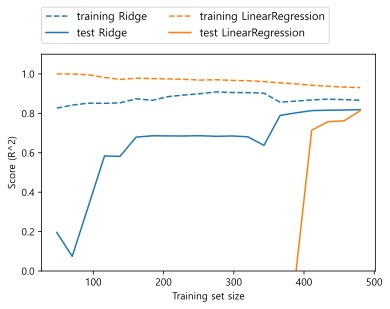

In [55]:
mglearn.plots.plot_ridge_n_samples()

In [62]:
lasso = Lasso(alpha=0.005, max_iter=10000).fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.9159618987334425, 0.7813535143177984)

In [63]:
np.sum(lasso.coef_ != 0)

43

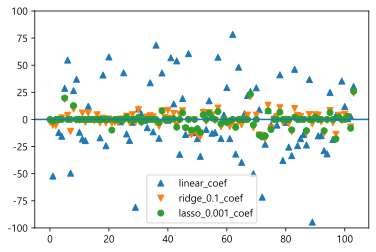

In [64]:
plt.plot(lr.coef_, '^', label='linear_coef')
plt.plot(ridge.coef_, 'v', label='ridge_0.1_coef')
plt.plot(lasso.coef_, 'o', label='lasso_0.001_coef')
plt.ylim(-100, 100)
plt.axhline()
plt.legend()

In [67]:
ela = ElasticNet(alpha=0.001, l1_ratio=0.7, max_iter=10000).fit(X_train, y_train)
ela.score(X_train, y_train), ela.score(X_test, y_test)

(0.9238124577236176, 0.7761672849803961)